# Classification Bank Churn Exploratory Data Analysis 

In [267]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('../data/train_data.csv')

df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0


## Variables Discrètes
- ID
- CustomerId
- Surname
- Geography
- Gender
- Tenure (Number of years the client is customer)
- NumOfProdcuts
- HasCrCard
- IsActiveMember
- Exited


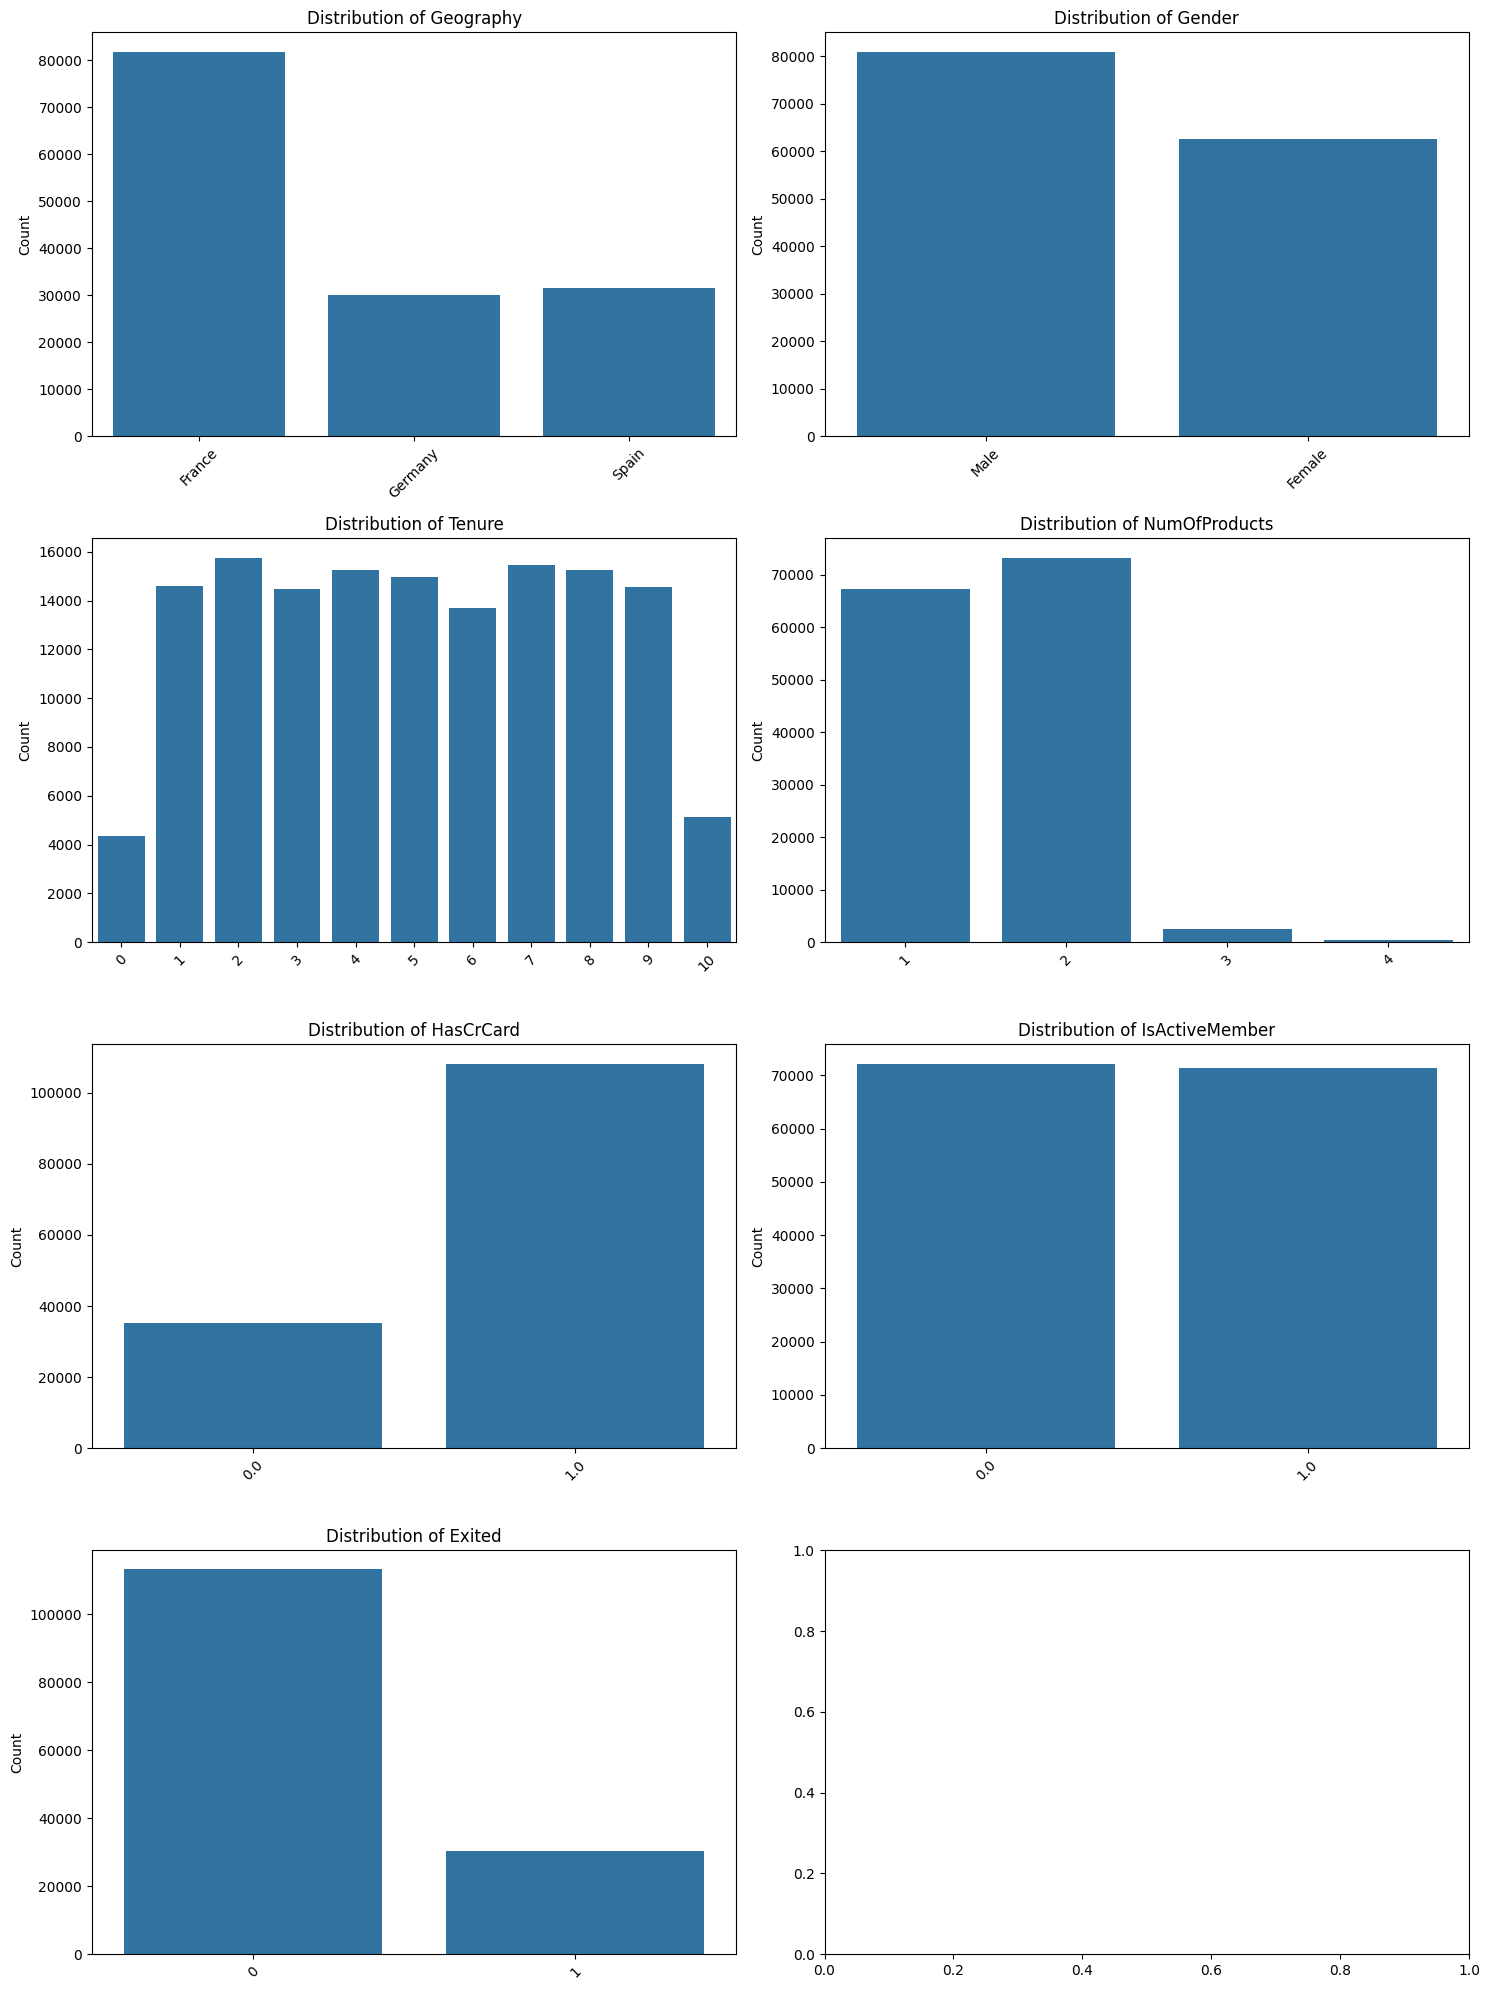

In [268]:
# Discrete variables
discrete_vars = ["Geography", "Gender", "Tenure",
                 "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Generate bar plots for each discrete variable
for i, col in enumerate(discrete_vars):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Varibales Continues
- CreditScore
- Age
- Balance
- EstimatedSalary

In [269]:
continuous_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
describe_df = df[continuous_features].describe()
display(describe_df)

,CreditScore,Age,Balance,EstimatedSalary
count,143579.000000,143579.000000,143579.000000,143579.000000
mean,656.411704,38.144476,55533.640642,112530.072465
std,80.210361,8.871711,62822.616346,50301.718378
min,350.000000,18.000000,0.000000,11.580000
25%,597.000000,32.000000,0.000000,74580.800000
50%,659.000000,37.000000,0.000000,117931.100000
75%,710.000000,42.000000,119948.090000,155149.685000
max,850.000000,92.000000,250898.090000,199992.480000


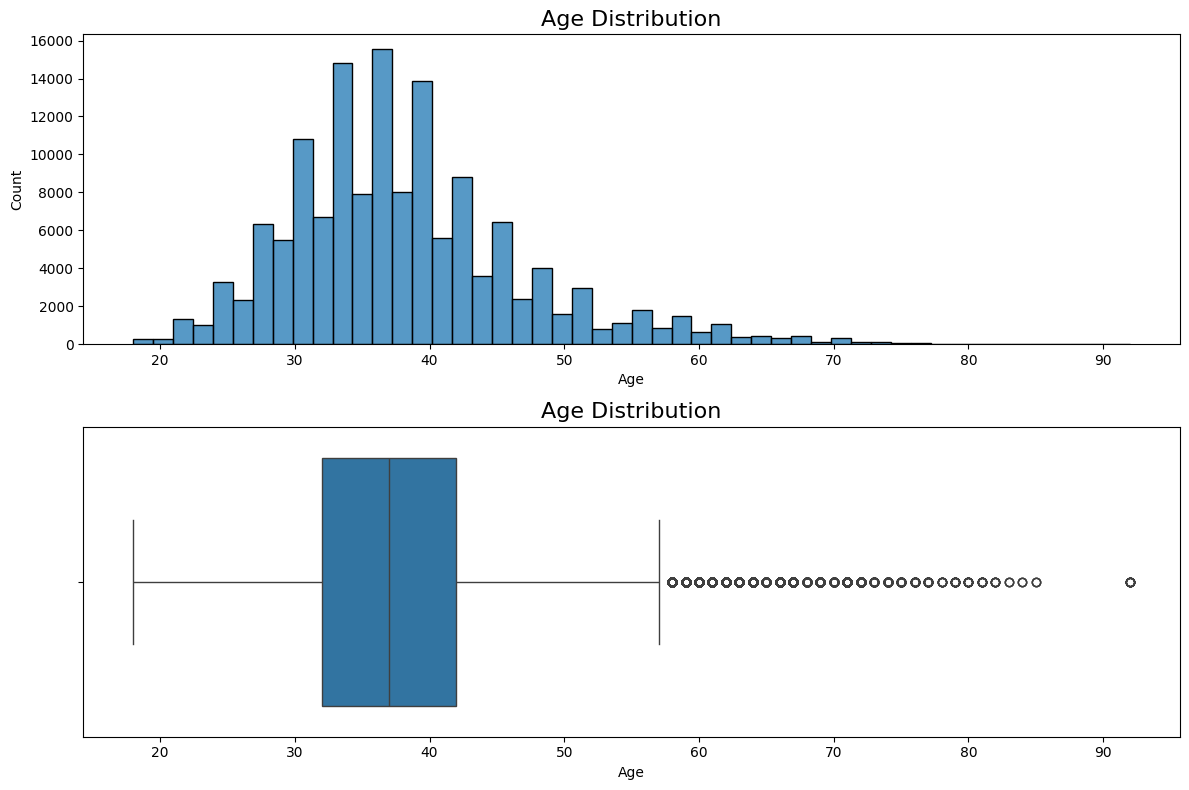

In [270]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

sns.histplot(df['Age'], ax=ax1, bins=50)
ax1.set_title("Age Distribution",fontsize=16)
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")


sns.boxplot(x=df['Age'], ax=ax2)
ax2.set_title("Age Distribution", fontsize=16)
ax2.set_xlabel("Age")

plt.tight_layout()
plt.show()

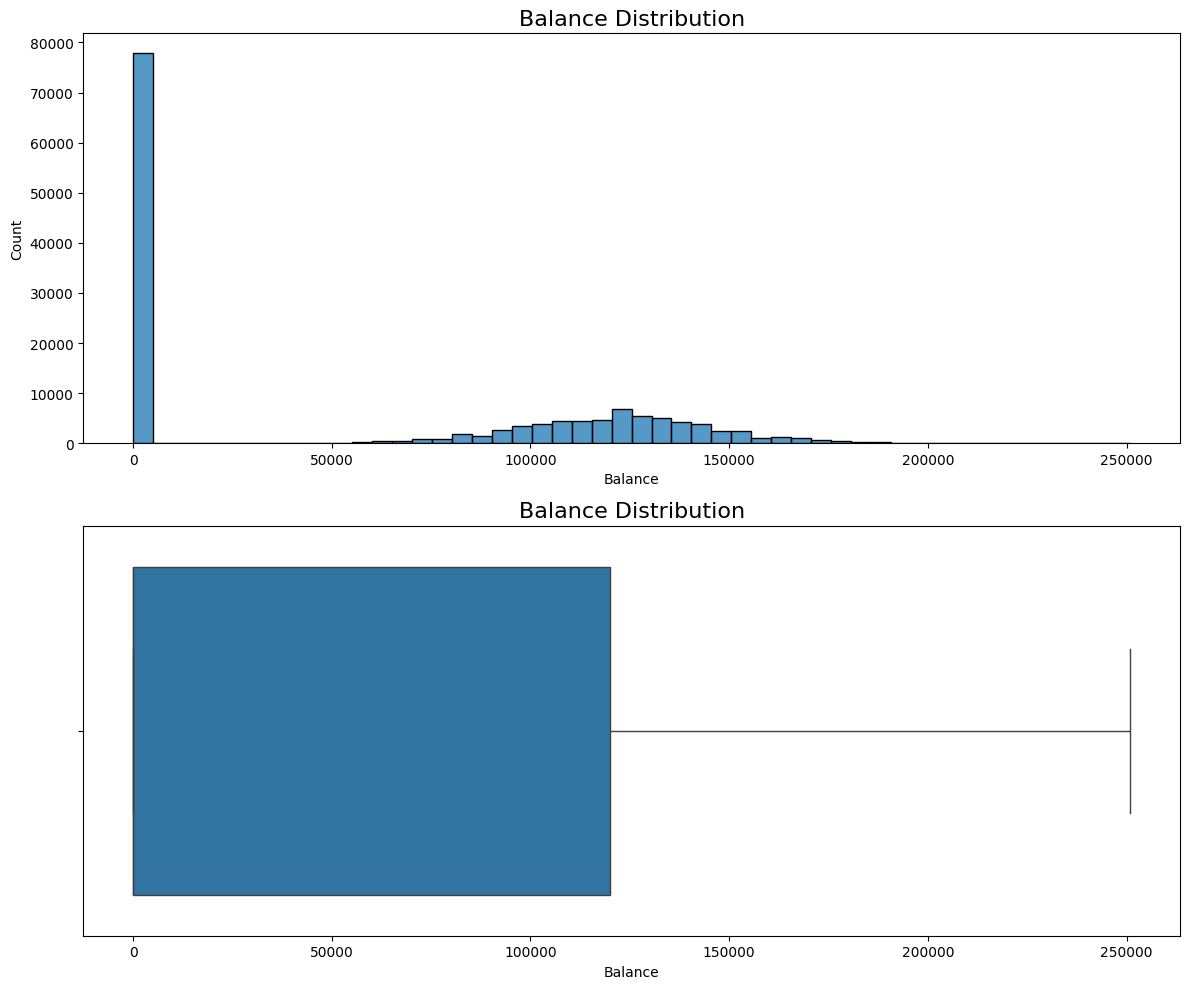

In [271]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

sns.histplot(df['Balance'], ax=ax1, bins=50)
ax1.set_title("Balance Distribution",fontsize=16)
ax1.set_xlabel("Balance")
ax1.set_ylabel("Count")


sns.boxplot(x=df['Balance'], ax=ax2)
ax2.set_title("Balance Distribution", fontsize=16)
ax2.set_xlabel("Balance")

plt.tight_layout()
plt.show()

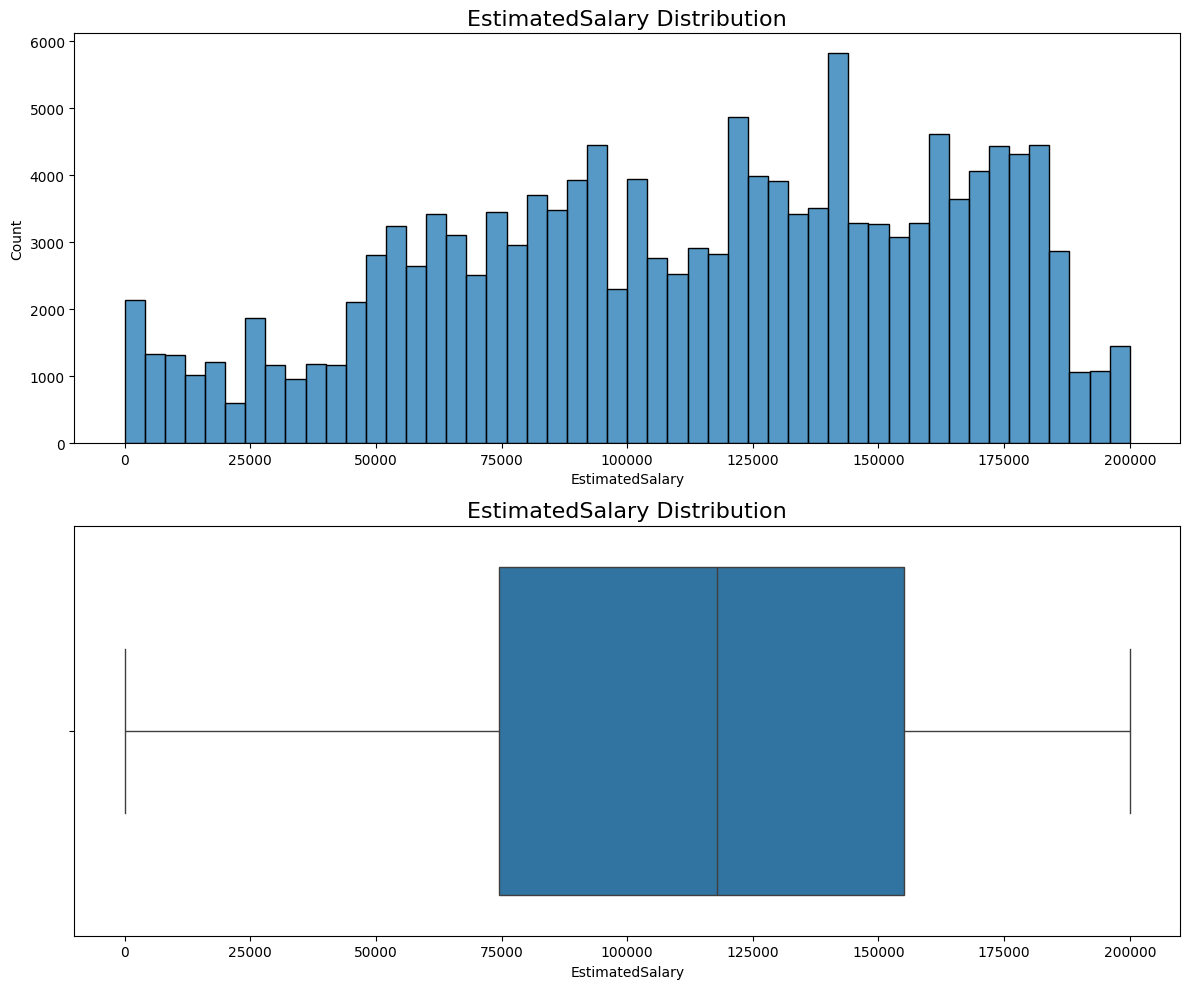

In [272]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

sns.histplot(df['EstimatedSalary'], ax=ax1, bins=50)
ax1.set_title("EstimatedSalary Distribution",fontsize=16)
ax1.set_xlabel("EstimatedSalary")
ax1.set_ylabel("Count")


sns.boxplot(x=df['EstimatedSalary'], ax=ax2)
ax2.set_title("EstimatedSalary Distribution", fontsize=16)
ax2.set_xlabel("EstimatedSalary")

plt.tight_layout()
plt.show()

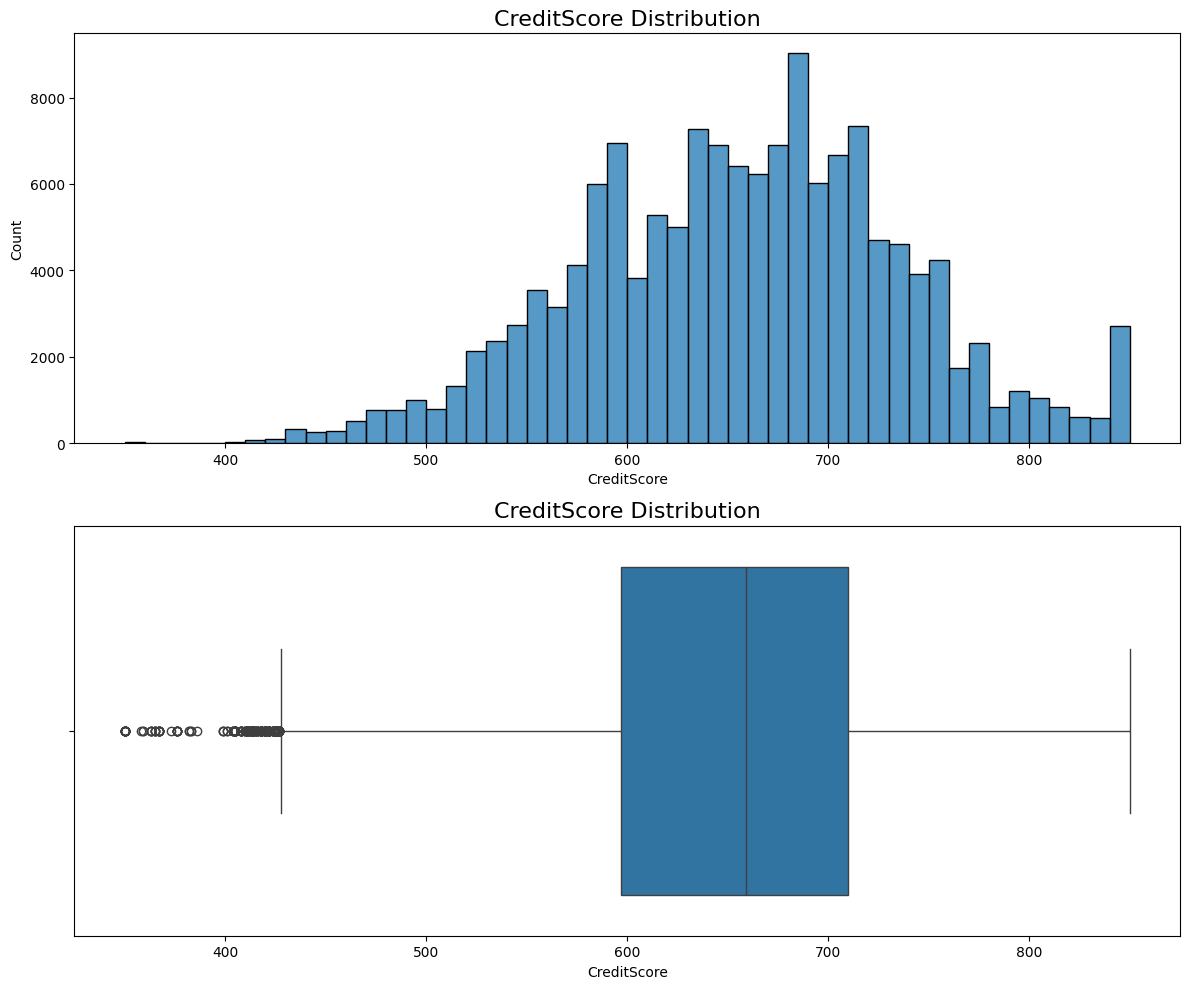

In [273]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

sns.histplot(df['CreditScore'], ax=ax1, bins=50)
ax1.set_title("CreditScore Distribution",fontsize=16)
ax1.set_xlabel("CreditScore")
ax1.set_ylabel("Count")


sns.boxplot(x=df['CreditScore'], ax=ax2)
ax2.set_title("CreditScore Distribution", fontsize=16)
ax2.set_xlabel("CreditScore")

plt.tight_layout()
plt.show()

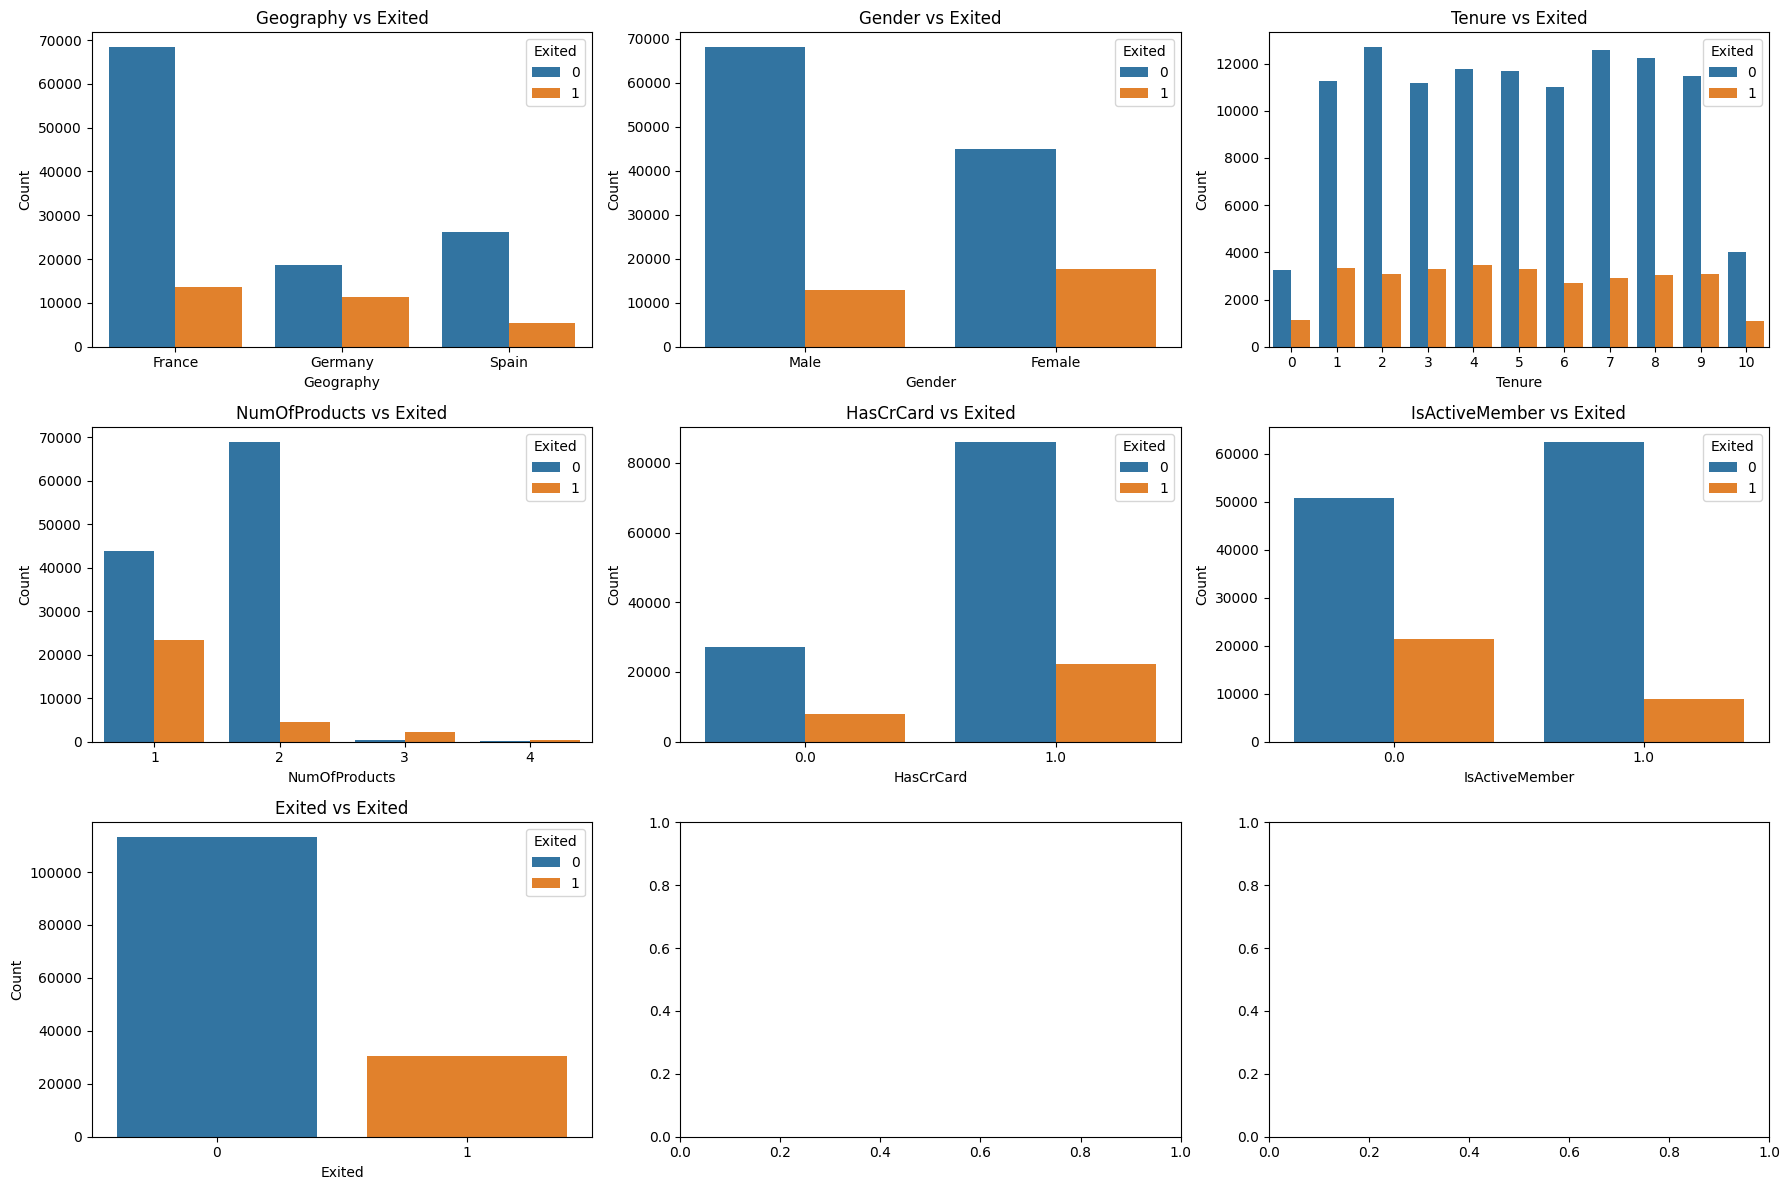

In [274]:
# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plot each discrete variable against 'Exited'
for i, col in enumerate(discrete_vars):
    sns.countplot(data=df, x=col, hue="Exited", ax=axes[i])
    axes[i].set_title(f"{col} vs Exited")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

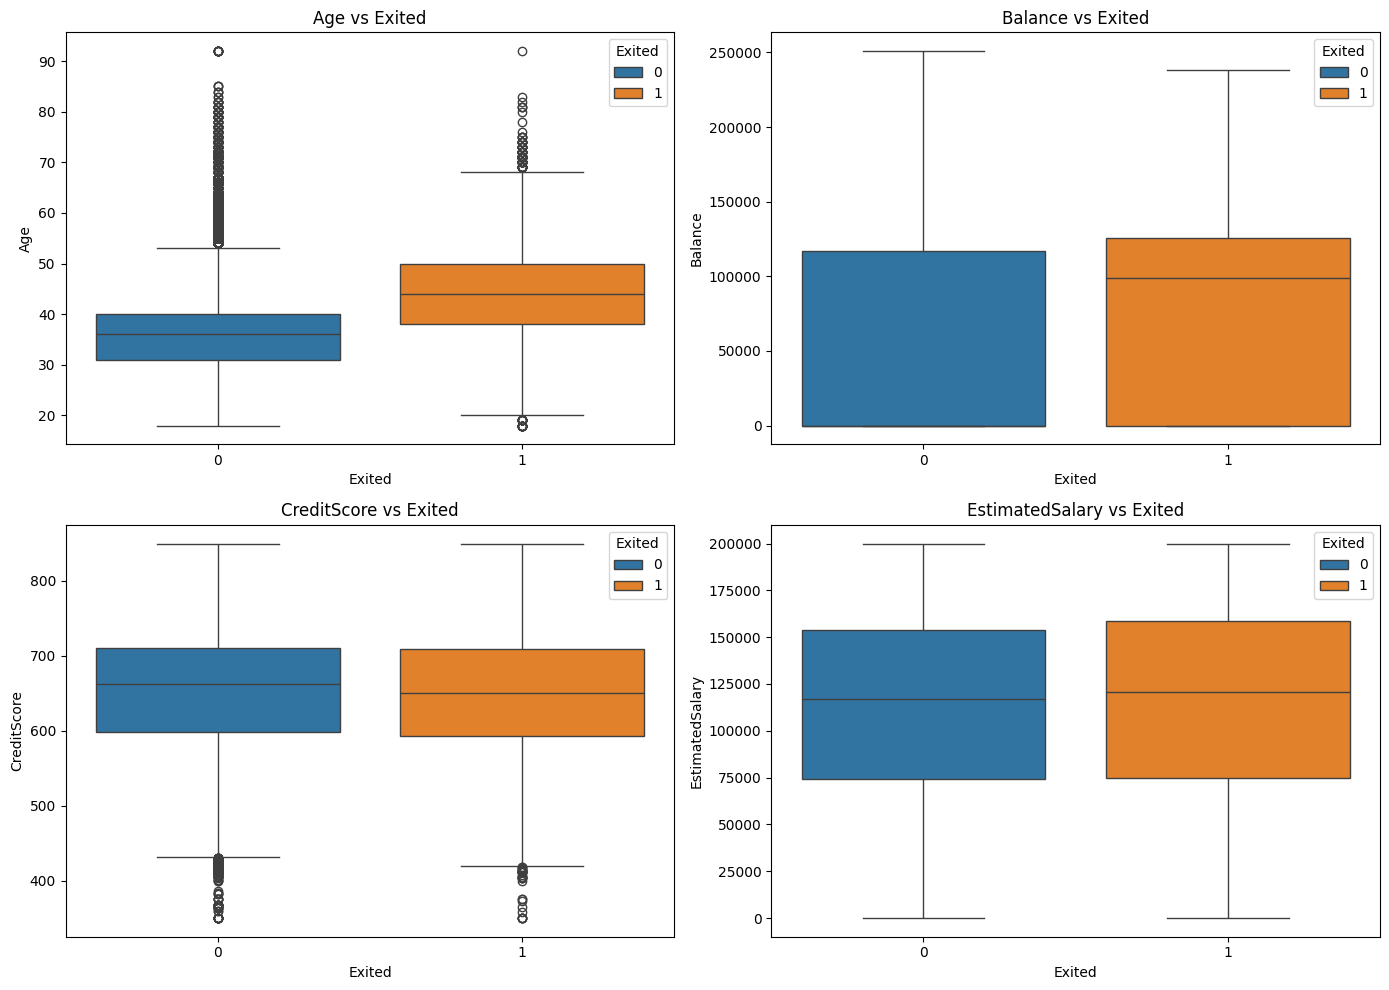

In [275]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()
continuous_vars = ["Age", "Balance", "CreditScore", "EstimatedSalary"]
for i, col in enumerate(continuous_vars):
    sns.boxplot(data=df, x="Exited", y=col, ax=axes[i], hue="Exited")
    axes[i].set_title(f"{col} vs Exited")
    axes[i].set_xlabel("Exited")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

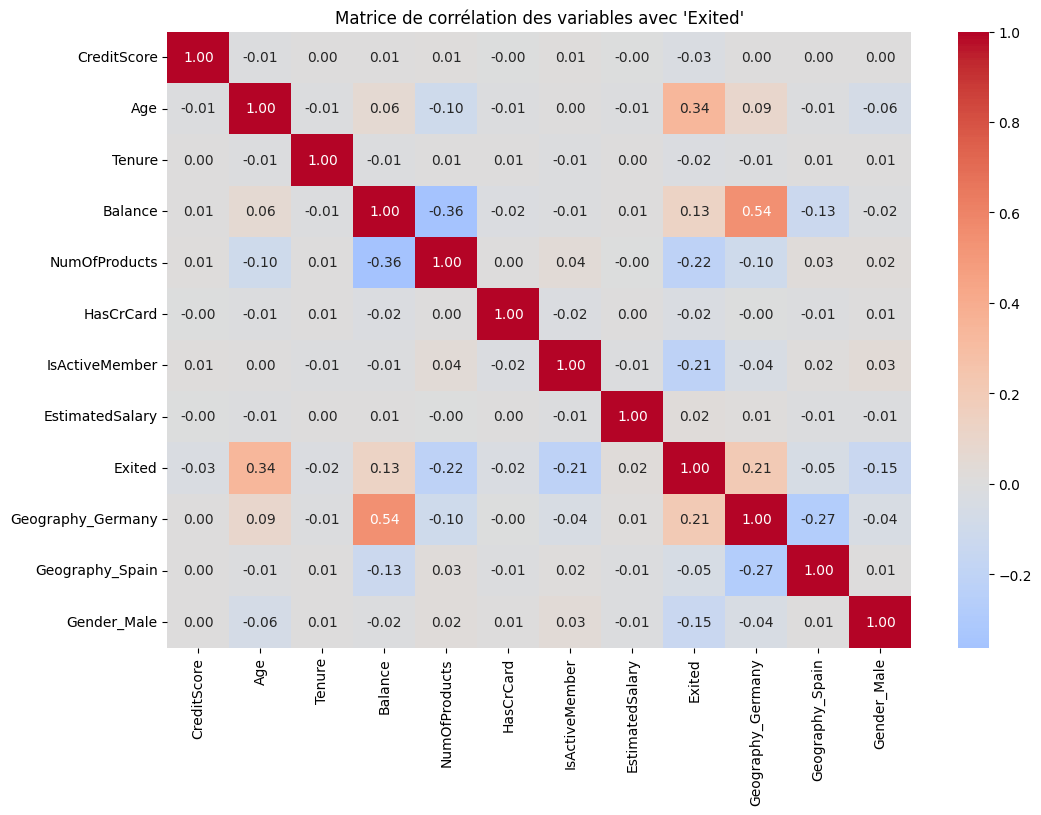

In [276]:
# Encodage One-Hot des variables catégoriques
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)  # Drop first évite la colinéarité
df.drop(columns=["ID", "CustomerId", "Surname"], inplace=True)

# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matrice de corrélation des variables avec 'Exited'")
plt.show()